In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
import missingno as mn

In [2]:
from scipy.stats import skew
from scipy.stats import kurtosis


In [3]:
import statsmodels.api as sm
import pylab as py

# F1 Loading data in a dataframe

In [4]:
def load_data(filetype):
    valid = {'sql','csv','excel'}
    if filetype not in valid:
        raise ValueError("filetype must be one of %r." % valid)
    if filetype=='csv':
        path=input('Enter path of file')
        df=pd.read_csv(path)
    elif filetype=='excel':
        path=input('Enter path of file')
        df=pd.read_excel(path)
    else:
        query=input('Enter sql query')
        #connect_params=input('Enter connection parameters')
        conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-AIS9287\SQLEXPRESS;'
                      'Database=IBA_23371;'# Parameters can be altered accordingly
                      'Trusted_Connection=yes;')
        cursor = conn.cursor()
        df = pd.read_sql_query(query,conn)
    return df



#### Demonstration of the function

In [5]:
df=load_data('csv')

Enter path of filehealth.csv


# F2 Checking shape, column types, and see the first/last 'n' rows using head/tail 

In [6]:
def overview(df,head,n):
    print('The shape is :',df.shape)
    print('The column data types are: \n')
    print(df.dtypes)
    print('\n')
    valid = {'head','tail'}
    if head not in valid:
        raise ValueError("Either head or tail")
    if head=='head':
        print('The first '+str(n)+' rows are :')
        display(df.head(n))
    else:
        print('The last '+str(n)+' rows are :')
        display(df.tail(n))
    

#### Demonstration

In [27]:
overview(df,'head',7)

The shape is : (84548, 22)
The column data types are: 

Unnamed: 0                          int64
BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                                object
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE                          object
dtype: object


The 

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,No Number,,65000,NaN,...,5,0,5,1633,6440,1900,2,C2,6625000,why
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,,C7,NaN,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,,C7,NaN,...,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,,C4,NaN,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,,C2,NaN,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,405.0,16,,C4,NaN,...,20,0,20,2581,9730,1900,2,C4,-,later
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,406.0,32,,C4,NaN,...,8,0,8,1750,4226,1920,2,C4,3192840,9/23/2016 0:00


# F3  Remove unnecessary/useless columns

In [7]:
def remove_cols(df,*columns):
    cols=[]
    for i in columns:
        cols.append(i)
    df.drop(columns=cols,inplace=True)
    

#### Demonstration

In [29]:
remove_cols(df,'Unnamed: 0','EASE-MENT')

In [31]:
overview(df,'head',7)

The shape is : (84548, 20)
The column data types are: 

BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                                object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE                          object
dtype: object


The first 7 rows are :


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,No Number,65000,NaN,NaN,10009.0,5,0,5,1633,6440,1900,2,C2,6625000,why
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,C7,NaN,,NaN,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,C7,NaN,,NaN,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,C4,NaN,,NaN,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,C2,NaN,,NaN,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,405.0,16,C4,NaN,,NaN,20,0,20,2581,9730,1900,2,C4,-,later
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,406.0,32,C4,NaN,,NaN,8,0,8,1750,4226,1920,2,C4,3192840,9/23/2016 0:00


# F4 Remove rows containing a particular value of a given column

In [8]:
def drop_rows(df,column,value):
    df.drop(df.loc[df[column]==value].index,inplace=True)

#### Demonstration

In [23]:
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.466667,never smoked,1


In [26]:
drop_rows(df,'id',9046)

In [27]:
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.466667,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1


# F5 Determine the missing values in the whole dataset

In [9]:
def missing_details(df):
    b = pd.DataFrame()
    b['Missing value, %'] = round(df.isnull().sum()/df.shape[0]*100)
    b['Missing value count']=df.isnull().sum()
    b['N unique value'] = df.nunique()
    return b 

#### Demonstration

In [28]:
missing_details(df)

,"Missing value, %",Missing value count,N unique value
Unnamed: 0,0.0,0,26736
BOROUGH,0.0,0,5
NEIGHBORHOOD,0.0,30,254
BUILDING CLASS CATEGORY,0.0,51,47
TAX CLASS AT PRESENT,0.0,7,11
BLOCK,0.0,16,11566
LOT,0.0,0,3428
EASE-MENT,0.0,0,1
BUILDING CLASS AT PRESENT,0.0,0,168
ADDRESS,0.0,45,67529


# F6 Analyze missing values of one or more columns using mano module

In [10]:
def missing_analysis(df,*cols):
    x=[]
    for i in cols:
        x.append(i)
    df2=df[x]
    chart_type=input('Enter the type of chart required')
    if chart_type=='bar':
        mn.bar(df2)
    elif chart_type=='matrix':
        mn.matrix(df2)
    elif chart_type=='heatmap':
        mn.heatmap(df2)
    elif chart_type=='dendrogram':
        mn.dendrogram(df2)
    else:
        raise ValueError('Chart type must be on of bar,matrix,heatmap or dendrogram')

#### Demonstration

Enter the type of chart requiredbar


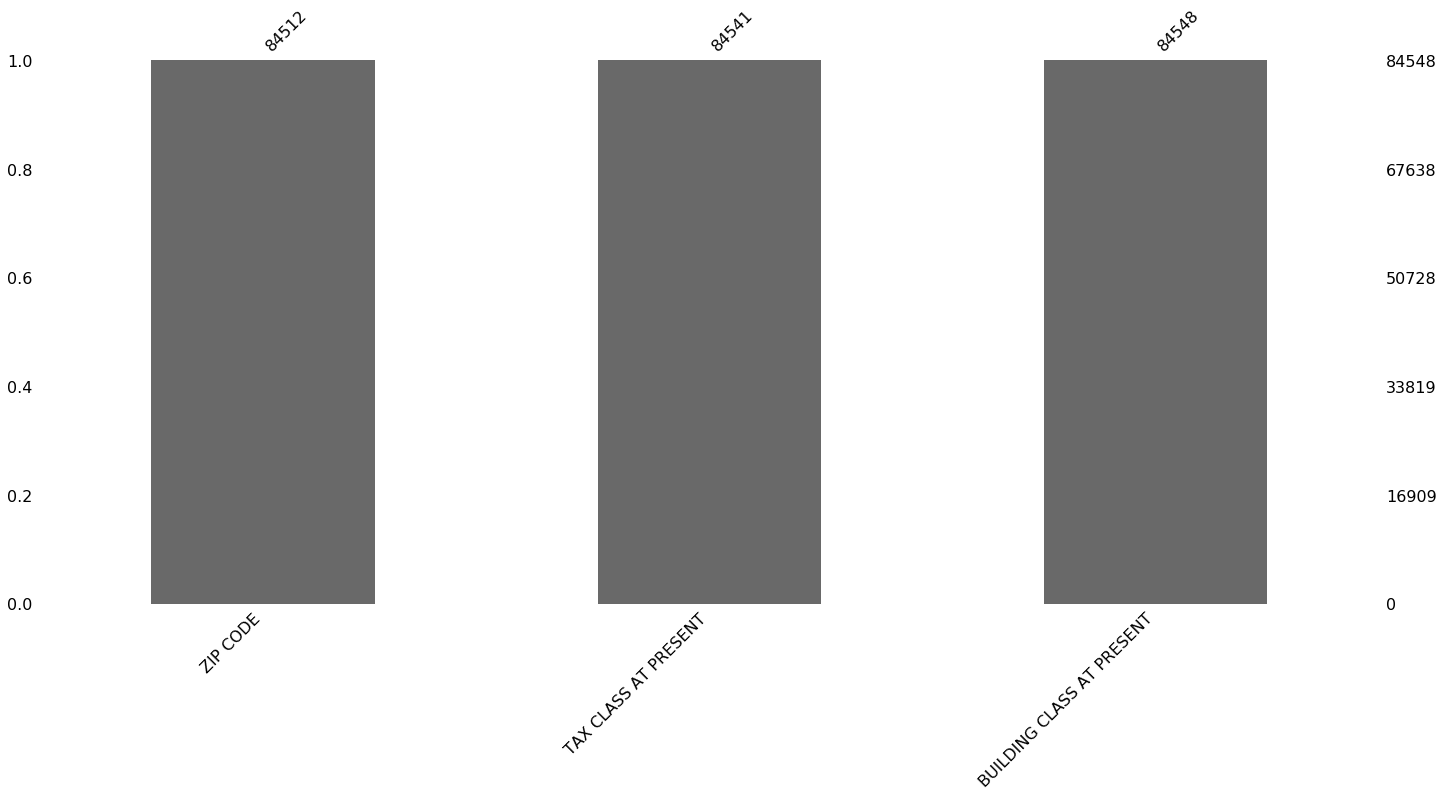

In [38]:
missing_analysis(df,'ZIP CODE','TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT')

# F7 Cater for missing values

In [16]:
def handle_mv(df,column,method):
    if method=='mean':
        df[column].fillna(df[column].mean(),inplace=True)
    elif method=='median':
        df[column].fillna(df[column].median(),inplace=True)
    elif method=='mode':
        df[column].fillna(df[column].mode()[0],inplace=True)
    elif method=='value':
        x=input('Enter value to replace null values')
        df[column].fillna(x,inplace=True)
    elif method=='interpolation':
        x=input('forward or backward interpolation?')
        if x=='forward':
            df[column] = df['column'].interpolate(method ='linear', limit_direction ='forward')
        elif x=='backward':
            df[column] = df['column'].interpolate(method ='linear', limit_direction ='backward')
        else:
            raise ValueError('Select on from forward or backward')
    elif method=='KNN':
        from sklearn.impute import KNNImputer
        neighbors=int(input('Enter number of number of neighbors'))
        df2=df.copy()
        imputer = KNNImputer (n_neighbors=neighbors)
        y=[]
        n=int(input('Enter the number of columns to fit KNN imputer'))
        for i in range(n):
            x=input('Enter name of column')
            y.append(x)
        y.append(column)
        df[y] = imputer.fit_transform(df[y])
        x_axis=input('x axis label')
        y_axis=input('y axis label')
        nulls=df2[x_axis].isna()+df2[y_axis].isna()
        df.plot(x=x_axis,y=y_axis,kind='scatter',alpha=0.5,c=nulls,cmap='rainbow')
        plt.show()
    elif method=='group_mode':        
        x=input('Enter name of second column')
        df2=df[[column,x]]
        df2[column]=df3.groupby(x).transform(lambda group:group.fillna(group.mode()[0]) )
        df[column]=df2[column]
    elif method=='drop': 
        df.dropna(axis=0, inplace=True)
    else:
        raise ValueError('method must be one of mean,median,mode,value,interpolation,KNN,group_mode or drop')

#### Demonstration

Enter number of number of neighbors3
Enter the number of columns to fit KNN imputer1
Enter name of columnage
x axis labelage
y axis labelbmi


E:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


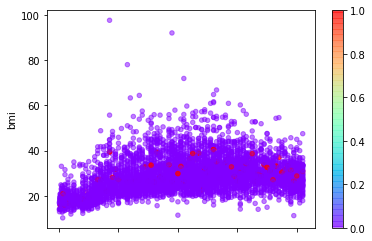

In [20]:
handle_mv(df,'bmi','KNN')

In [21]:
missing_details(df)

,"Missing value, %",Missing value count,N unique value
id,0.0,0,5110
gender,0.0,0,3
age,0.0,0,104
hypertension,0.0,0,2
heart_disease,0.0,0,2
ever_married,0.0,0,2
work_type,0.0,0,5
Residence_type,0.0,0,2
avg_glucose_level,0.0,0,3979
bmi,0.0,0,472


# F8 Function for numerical data analysis 

In [33]:
def numerical_analysis(df,column):
    sns.distplot(df[column])
    plt.show()
    sns.boxplot(df[column])
    plt.show()
    sm.qqplot(df[column], line ='45') 
    py.show()
    display(df[column].describe())
    from scipy.stats import skew
    from scipy.stats import kurtosis
    Skew=skew(df[column])
    Kurtosis=kurtosis(df[column])
    print('Skew is',Skew)
    print('Kurtosis is',Kurtosis)
    if Skew>-2 and Skew<2 and Kurtosis>-7 and Kurtosis<7:
        print('Can be considered normally distributed on the basis of skewness and kurtosis')
    else:
        print('Cannot be considered normally distributed on the basis of skewness and kurtosis')
    print('\n')
    print('Shapiro Wilk Test for Normality')
    from scipy.stats import shapiro
    stat,p=shapiro(df[column])
    print('stat=%.3f,p=%.3f\n'%(stat,p))
    if p>0.05:
        print('Normally distributed according to shapiro test')
    else:
        print('Not Normally distributed according to shapiro test')
    print('\n')
    print('Anderson Test for Normality')
    from scipy.stats import anderson
    result=anderson(df[column])
    print('stat=%.3f'%(result.statistic))
    for i in range(len(result.critical_values)):
        sig_level,cric_value=result.significance_level[i],result.critical_values[i]
        if result.statistic<cric_value:
            print(f"Probably Normally distributed {cric_value} critical value at {sig_level} level of significance")
        else:
            print(f"Probably Not Normally distributed {cric_value} critical value at {sig_level} level of significance")
    print('\n')
    print('Chi square Normality test')
    from scipy.stats import chisquare
    stat,p=chisquare(df[column])
    print('stat=%.3f,p=%.3f\n'%(stat,p))
    if p>0.05:
        print('Normally distributed according to chisquare test')
    else:
        print('Not Normally distributed according to chisquare test')
    print('\n')
    print('Lilliefors Test for Normality')
    from statsmodels.stats.diagnostic import lilliefors
    stat,p=lilliefors(df[column])
    print('stat=%.3f,p=%.3f\n'%(stat,p))
    if p>0.05:
        print('Normally distributed according to lilliefors test')
    else:
        print('Not Normally distributed according to lilliefors test')
    print('\n')
    print('Kolmogorov-Smirnov test')
    from scipy.stats import kstest
    stat,p=kstest(df[column],'norm')
    print('stat=%.3f,p=%.3f\n'%(stat,p))
    if p>0.05:
        print('Normally distributed according to Kolmogorov-Smirnov test')
    else:
        print('Not normally distributed according to Kolmogorov-Smirnov test')

#### Demonstration

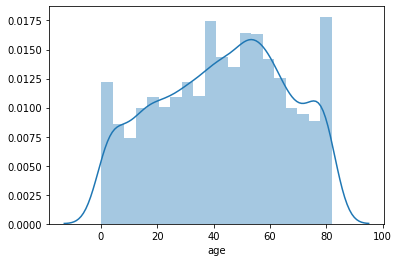

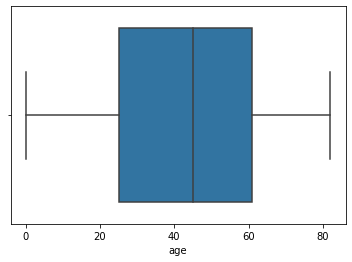

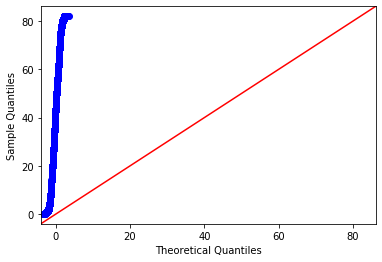

count    5109.000000
mean       43.221961
std        22.612413
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

Skew is -0.1366602748290658
Kurtosis is -0.9910904037056252
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.967,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=33.817
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.655 critical value at 10.0 level of significance
Probably Not Normally distributed 0.786 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=60428.281,p=0.000

Not Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.051,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.964,p=0.000

Not normally distributed according to

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [34]:
numerical_analysis(df,'age')

# F9 Function for categorical data analysis

In [12]:
def categorical_analysis(df,column):
    print(df[column].value_counts())
    plt.subplots(figsize=(12,6))
    sns.countplot(df[column])

#### Demonstration

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


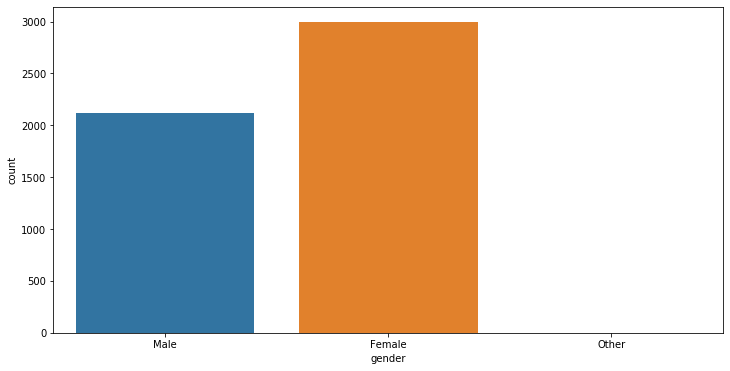

In [48]:
categorical_analysis(df,'gender')

# F10 Function to change the type of any column

In [30]:
def change_type(df,column,t):
    if t=='integer':
        df[column]=pd.to_numeric(df[column],downcast='integer')
    elif t=='float':
        df[column]=pd.to_numeric(df[column],downcast='float')
    elif t=='datetime':
        df[column]=pd.to_datetime(df[column])
    elif t=='object':
        df[column]=df[column].astype('object')
    else:
        raise ValueError('Must be one of integer,float,datetime,object')
        

#### Demonstration

In [31]:
change_type(df,'id','object')

In [32]:
df.dtypes

id                    object
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

# F11 Function to change the discretizations of a particular catergorical column

In [14]:
def change_descr(df,column,value=None,new_value=None):
    x=input('Remove white space? Y or N')
    if x=='Y':
        df[column]=df[column].str.replace(' ','')
    elif x=='N':
        df[column]=df[column].replace(value,new_value)
    else:
        raise ValueError('Y or N only')
    y=input('change column name? Y or N')
    if y=='Y':
        z=input('Enter new column name')
        df.rename(columns={column:z},inplace=True)
    else:
        pass

#### Demonstration

In [51]:
change_descr(df,'gender',value='Other',new_value=np.nan)

Remove white space? Y or NN
change column name? Y or NN


Female    2994
Male      2115
Name: gender, dtype: int64


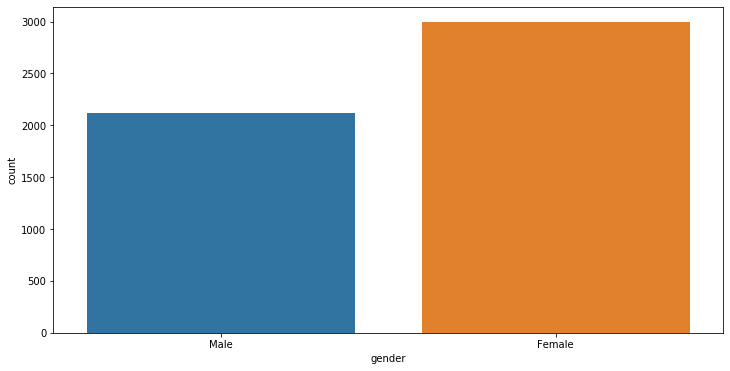

In [52]:
categorical_analysis(df,'gender')

# F12 Function for data analysis - extract year, month etc., subtract dates


In [15]:
def date_function(df,column,subtract=False):
    df['year']=df[column].dt.year
    df['month']=df[column].dt.month
    if subtract==True:
        x=input('Enter 2nd column name')
        df['date_diff']=df[column]-df[x]

# F13 Function to make a deep copy of a dataframe

In [16]:
def deep_copy(df):
    df2=df.copy(deep=True)
    return df2

# F14 Function to encode categorical into numerical

In [17]:
def encode(df,*columns):
    cols=[]
    for i in columns:
        cols.append(i)
    encode_type=input('Enter encode type')
    if encode_type=='label':
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        for i in cols:
            df[i]=le.fit_transform(df[[i]])
        return df
    elif encode_type=='ordinal':
        for i in cols:

            ord_dict={}
            print(i)
            n=int(input("enter a number of unique values present in the column: "))
            for j in range(n):
                key=input('Unique value for the column')
                value=int(input('Enter ordinal number for the value'))
                ord_dict[key]=value
            x=df[i].map(ord_dict)
            df[i]=x
        return df
    elif encode_type=='one-hot':
        df2=pd.get_dummies(df,columns=cols)
        
        return df2
    else:
        raise Error('Invalid encode type, select one from label,ordinal,one-hot')

#### Demonstration of the function

In [19]:
df=load_data('csv')

Enter path of filehealth.csv


In [20]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [21]:
df2=encode(df,'Residence_type','ever_married')



Enter encode typelabel


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [22]:
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,1,Private,1,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


# F15 Function to split dataframe into X (predictors) and y (label), apply standard scaling on X, apply the desired ML algorithm and output the results

In [56]:
def fit_model(df,label,algorithm,classification=True):
    algorithms={'Regression','KNN','Naive Bayes','Decision Tree','Random Forest','Gradient Boosting'}
    if algorithm not in algorithms:
        raise ValueError("Algorithm must be one of %r." % valid)
    from sklearn import metrics
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import LogisticRegression
    from sklearn import tree
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.naive_bayes import GaussianNB
    from yellowbrick.classifier import ConfusionMatrix
    from sklearn.metrics import auc 
    from sklearn.metrics import log_loss
    from matplotlib import pyplot
    dict_classifiers = {"Regression":LogisticRegression(),"KNN": KNeighborsClassifier(),"Decision Tree": tree.DecisionTreeClassifier(),"Naive Bayes": GaussianNB(), "Random Forest": RandomForestClassifier(),"Gradient Boosting": GradientBoostingClassifier()}
    dict_regression={"Regression":LinearRegression(),"KNN": KNeighborsRegressor(),"Decision Tree": tree.DecisionTreeRegressor(), "Random Forest": RandomForestRegressor(),"Gradient Boosting": GradientBoostingRegressor()}
    x=df.drop([label], axis=1)
    y=df[label]
    from sklearn.preprocessing import StandardScaler
    ss=StandardScaler()
    for i in x.columns:
        x[i] = ss.fit_transform(x[[i]])
    from sklearn.model_selection import train_test_split
    xtrain , xtest , ytrain, ytest =train_test_split(x,y,test_size=0.20,random_state=42 )
    if classification==True:
        classifier=dict_classifiers[algorithm]
        classifier.fit(xtrain,ytrain)
        y_pred=classifier.predict(xtest)
        print("Accuracy  (%): \n", accuracy_score(ytest, y_pred)*100)
        fpr , tpr, _ = roc_curve(ytest, y_pred)
        print("AUC  (%): \n",auc(fpr, tpr)*100)
        print("Precision: \n",precision_score(ytest, y_pred)*100)
        print("Recall (%): \n",recall_score(ytest, y_pred)*100)
        print("f1 score (%): \n",f1_score(ytest, y_pred)*100)
        print('logistic loss :\n',log_loss(ytest,y_pred))
        print(algorithm + '\n'+classification_report(ytest,y_pred))
        #print(confusion_matrix(ytest, y_pred))
        visualizer = ConfusionMatrix(classifier)
        visualizer.fit(xtrain, ytrain)  
        visualizer.score(xtest,ytest)
        g = visualizer.poof()
        pyplot.plot(fpr, tpr, marker='.')
        pyplot.xlabel('False Positive Rate')
        pyplot.ylabel('True Positive Rate')
        pyplot.show()
    else:
        if algorithm=='Naive Bayes':
            raise Error('Regression cannot be done with Naive Bayes')
        else:
            regressor=dict_regression[algorithm]
            regressor.fit(xtrain,ytrain)
            y_pred=regressor.predict(xtest)
            print('Mean Absolute Error is ',metrics.mean_absolute_error(ytest, y_pred))
            print('Mean Squared Error is ',metrics.mean_squared_error(ytest, y_pred))
            print('The R squared Error is ',metrics.r2_score(ytest,y_pred))
            r2=metrics.r2_score(ytest,y_pred)
            n=len(xtrain)
            k=len(x.columns)
            r2_adj=1-((1-r2)*(n-1)/(n-k-1))
            print('The adjusted R Squared Error is',r2_adj)
            plt.scatter(ytest, y_pred, c = 'green') 
            plt.xlabel("True Value") 
            plt.ylabel("Predicted value") 
            plt.title("True value vs predicted value") 
            plt.show()

#### Demonstration of the function for classification

In [30]:
df=load_data('csv')

Enter path of fileE:/Drive/Untitled Folder/Covid Prediction/covid_data.csv


In [31]:
df

,QUESTION 1,QUESTION 2,QUESTION 3,QUESTION 4,QUESTION 5,QUESTION 6,QUESTION 7,QUESTION 8,QUESTION 9,QUESTION 10,QUESTION 11,QUESTION 12,QUESTION 13,QUESTION 14,QUESTION 15
0,3.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,5.0,2.0,5.0,2.0,1.0,2.0
1,3.0,2.0,2.0,2.0,3.0,3.0,4.0,4.0,3.0,5.0,1.0,1.0,1.0,2.0,1.0
2,3.0,2.0,3.0,2.0,1.0,1.0,3.0,3.0,4.0,3.0,3.0,4.0,1.0,4.0,1.0
3,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,2.0,5.0,3.0,2.0,2.0,1.0,1.0
4,2.0,1.0,3.0,1.0,3.0,2.0,2.0,2.0,5.0,3.0,1.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,3.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,1.0,3.0,2.0
496,3.0,2.0,1.0,1.0,2.0,2.0,3.0,1.0,2.0,5.0,3.0,2.0,2.0,1.0,1.0
497,3.0,2.0,3.0,1.0,3.0,2.0,2.0,2.0,5.0,3.0,1.0,1.0,1.0,2.0,1.0
498,3.0,1.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0


In [32]:
change_descr(df,'QUESTION 15',value=1.0,new_value=0)

Remove white space? Y or NN
change column name? Y or NN


In [33]:
change_descr(df,'QUESTION 15',value=2.0,new_value=1)

Remove white space? Y or NN
change column name? Y or NN


In [34]:
df

,QUESTION 1,QUESTION 2,QUESTION 3,QUESTION 4,QUESTION 5,QUESTION 6,QUESTION 7,QUESTION 8,QUESTION 9,QUESTION 10,QUESTION 11,QUESTION 12,QUESTION 13,QUESTION 14,QUESTION 15
0,3.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,5.0,2.0,5.0,2.0,1.0,1.0
1,3.0,2.0,2.0,2.0,3.0,3.0,4.0,4.0,3.0,5.0,1.0,1.0,1.0,2.0,0.0
2,3.0,2.0,3.0,2.0,1.0,1.0,3.0,3.0,4.0,3.0,3.0,4.0,1.0,4.0,0.0
3,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,2.0,5.0,3.0,2.0,2.0,1.0,0.0
4,2.0,1.0,3.0,1.0,3.0,2.0,2.0,2.0,5.0,3.0,1.0,1.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,3.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,1.0,3.0,1.0
496,3.0,2.0,1.0,1.0,2.0,2.0,3.0,1.0,2.0,5.0,3.0,2.0,2.0,1.0,0.0
497,3.0,2.0,3.0,1.0,3.0,2.0,2.0,2.0,5.0,3.0,1.0,1.0,1.0,2.0,0.0
498,3.0,1.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0


Accuracy  (%): 
 99.0
AUC  (%): 
 98.86363636363636
Precision: 
 100.0
Recall (%): 
 97.72727272727273
f1 score (%): 
 98.85057471264368
logistic loss :
 0.34538776394910775
Decision Tree
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        56
         1.0       1.00      0.98      0.99        44

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


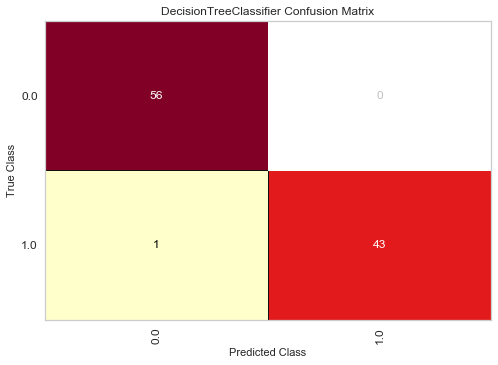

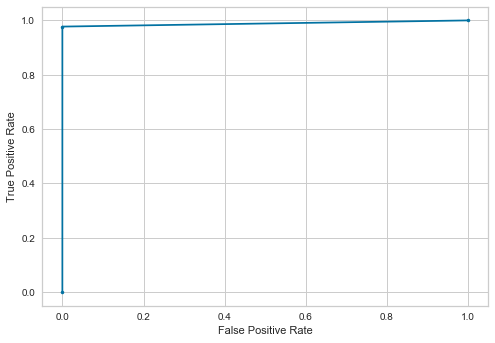

In [35]:
fit_model(df,'QUESTION 15','Decision Tree',classification=True)

#### Demonstration for Regression

In [62]:
df=load_data('csv')

Enter path of fileE:/downloads/CarPrice_Assignment.csv


In [64]:
remove_cols(df,'car_ID','peakrpm','symboling','compressionratio','stroke','fuelsystem','CarName','cylindernumber','enginetype','enginelocation','drivewheel','carbody','aspiration')

In [65]:
df2=encode(df,'fueltype','doornumber')

Enter encode typelabel


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Mean Absolute Error is  1275.1580528455286
Mean Squared Error is  3385222.46239026
The R squared Error is  0.9571186972151989
The adjusted R Squared Error is 0.9537109115634267


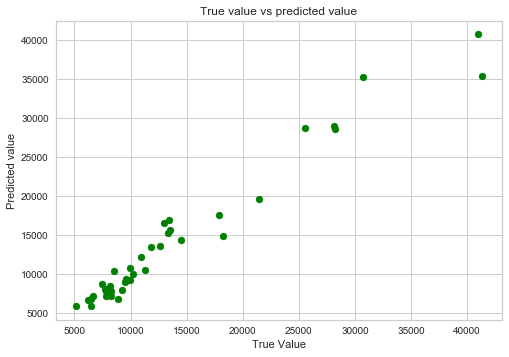

In [66]:
fit_model(df,'price','Random Forest',classification=False)

# F16 Function to apply ANOVA and output results

In [54]:
def anova(df,continous,categorical):
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    lm=ols(continous+'~'+categorical,data=df).fit()
    table=sm.stats.anova_lm(lm)
    display(table)

#### Demonstration

In [55]:
anova(df,'avg_glucose_level','gender')

,df,sum_sq,mean_sq,F,PR(>F)
gender,1.0,3.136787e+04,31367.869891,15.338879,0.000091
Residual,5107.0,1.044377e+07,2044.990978,NaN,NaN


# F17 Function to generate correlation heatmaps

In [19]:
def corr_heatmap(df):
    corr=df.corr()
    plt.subplots(figsize=(12,12))
    sns.heatmap(corr,annot=True)

#### Demonstration

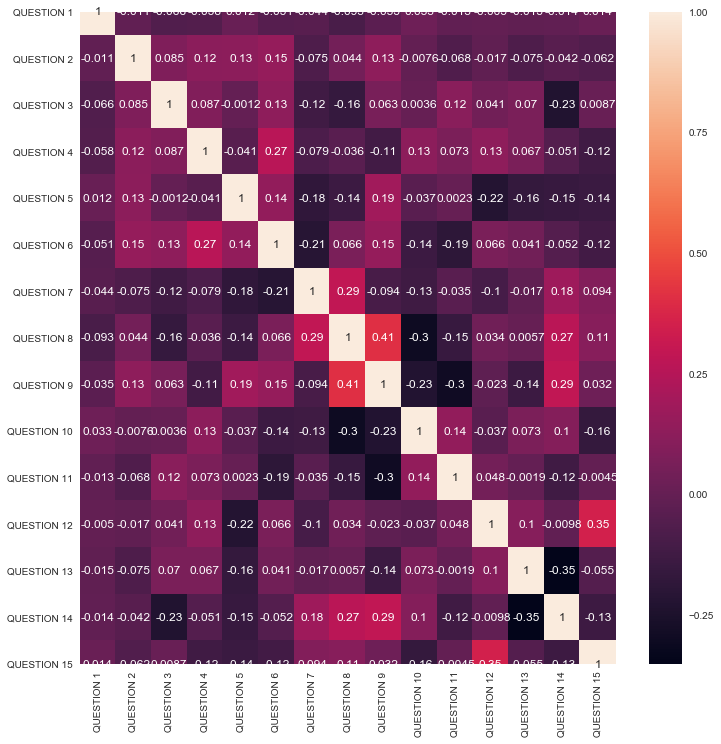

In [37]:
corr_heatmap(df)

# F18

In [20]:
def scatter(df,column1,column2):
    plt.subplots(figsize=(12,12))
    sns.scatterplot(df[column1],df[column2])

#### Demonstration

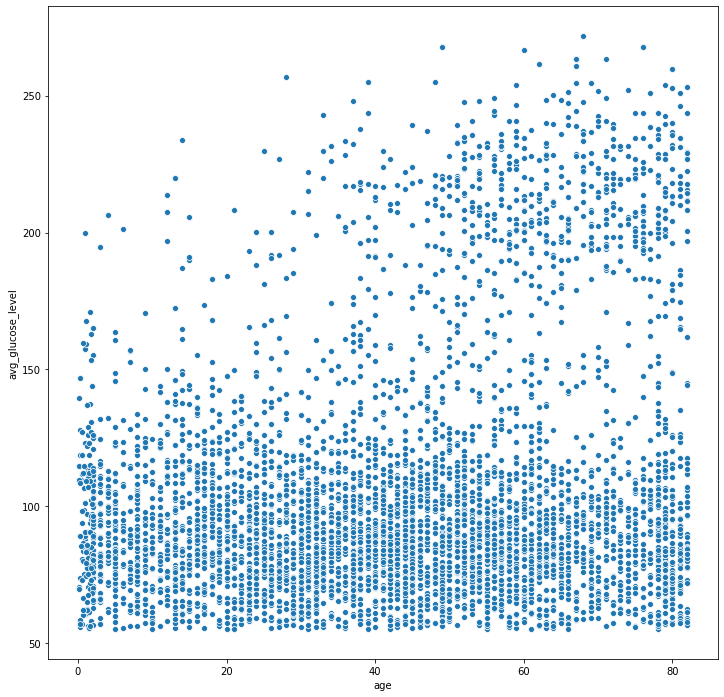

In [53]:
scatter(df,'age','avg_glucose_level')